# **Diabetes Prediction Using Machine Learning**

### **Details about the dataset:**
The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- **Pregnancies:** Number of times pregnant
- **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure:** Diastolic blood pressure (mm Hg)
- **SkinThickness:** Triceps skin fold thickness (mm)
- **Insulin:** 2-Hour serum insulin (mu U/ml)
- **BMI:** Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction:** Diabetes pedigree function
- **Age:** Age (years)
- **Outcome:** Class variable (0 or 1)

## **Exploratory Data Analysis**

In [1]:
# Importing the packages
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
# Reading the dataset
df = pd.read_csv('datasets/diabetes.csv')

In [3]:
# Printing the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### The dataset consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [5]:
# Descriptive statistics of the data set
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Print the size of the data set. It consists of 768 observation units and 9 variables.
print("Dataset shape:", df.shape)

Dataset shape: (768, 9)


In [7]:
# Print the distribution of the Outcome variable.
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [8]:
# Print the classes of the outcome variable.
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

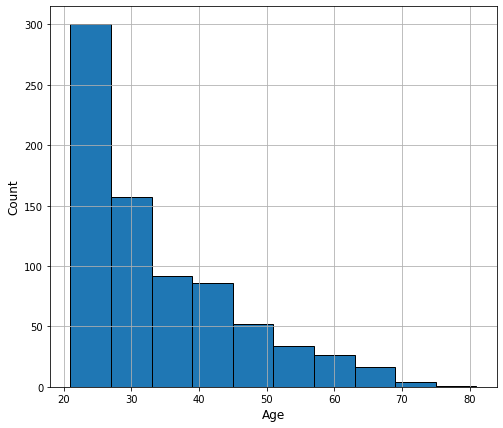

In [9]:
# Plot the histogram of the Age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
df["Age"].hist(edgecolor = "black");

In [10]:
print("Max Age: " + str(df["Age"].max()) +','+ " Min Age: " + str(df["Age"].min()))

Max Age: 81, Min Age: 21


<AxesSubplot:xlabel='BMI', ylabel='Density'>

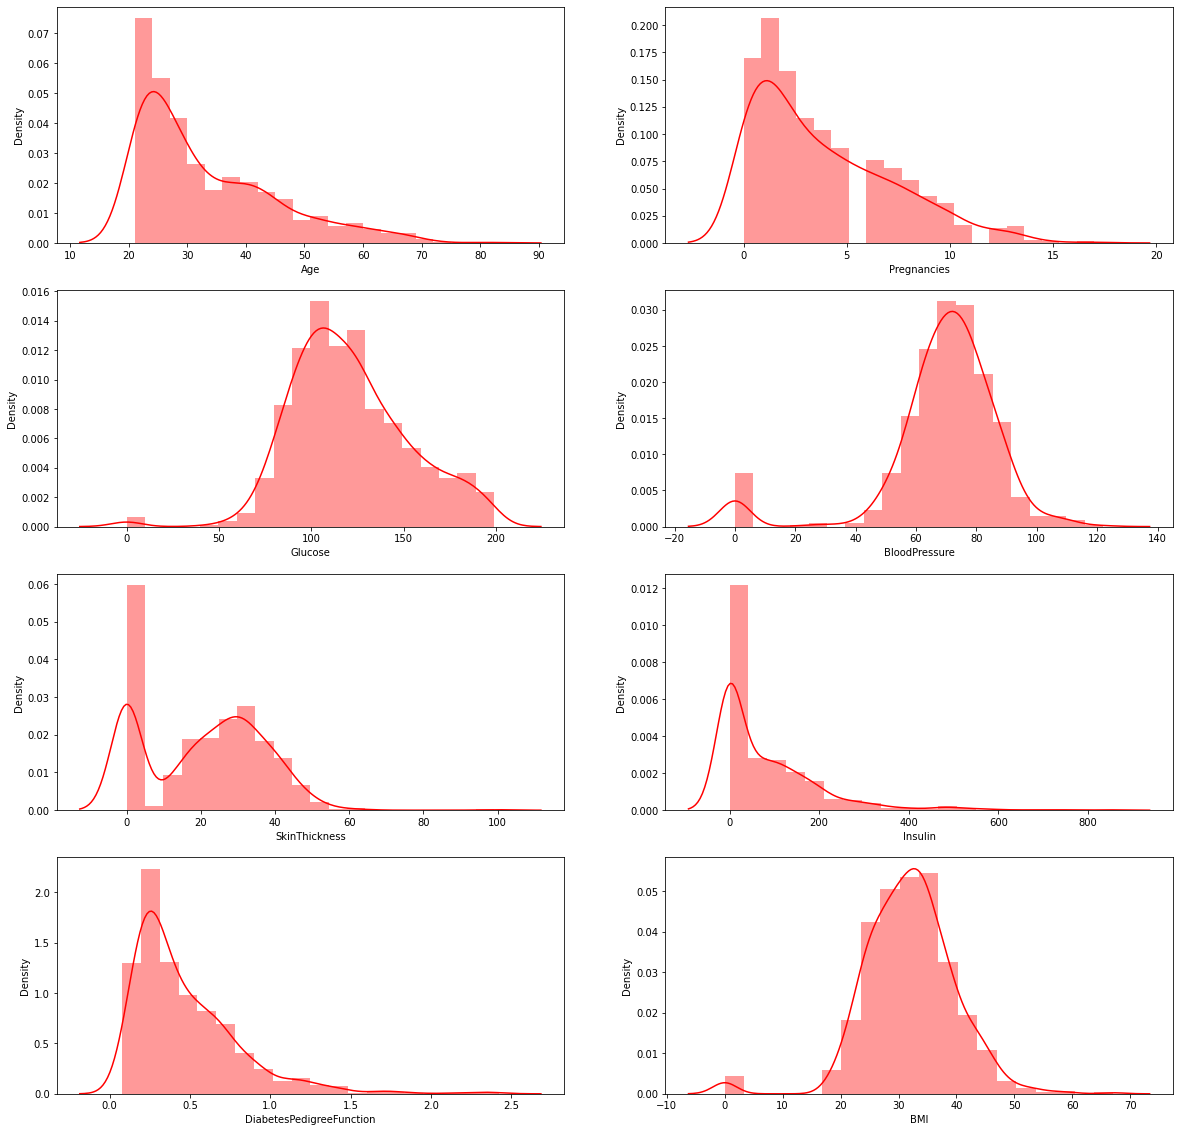

In [11]:
# Plot histogram and density graphs of all variables
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Age, bins = 20, ax=ax[0,0], color="red") 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1], color="red") 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0], color="red") 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1], color="red") 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0], color="red")
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0], color="red") 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1], color="red")

In [12]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [13]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [14]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [15]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [16]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [17]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [18]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [19]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


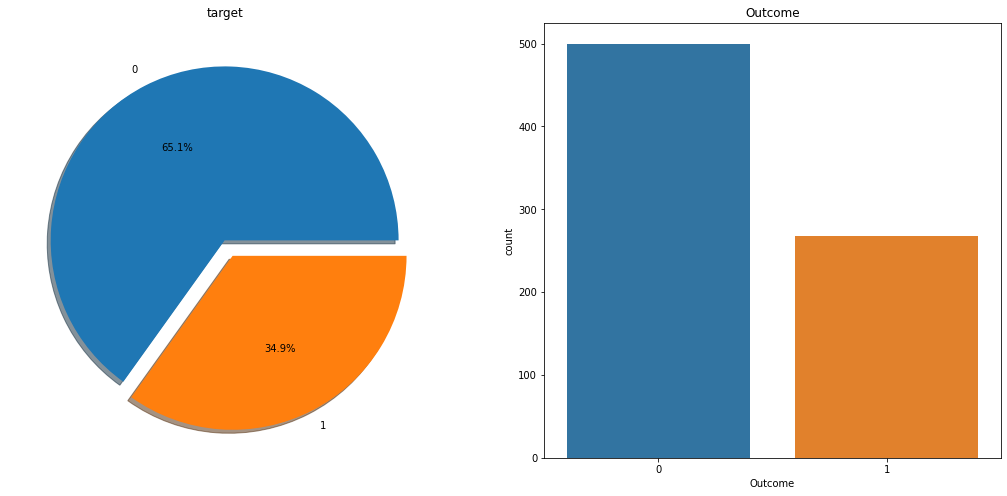

In [20]:
# Visualize the distribution of the outcome variable in the data -> 0 - Healthy, 1 - Diabetic
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [21]:
# corr() is used to find the pairwise correlation of all columns in the dataframe
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


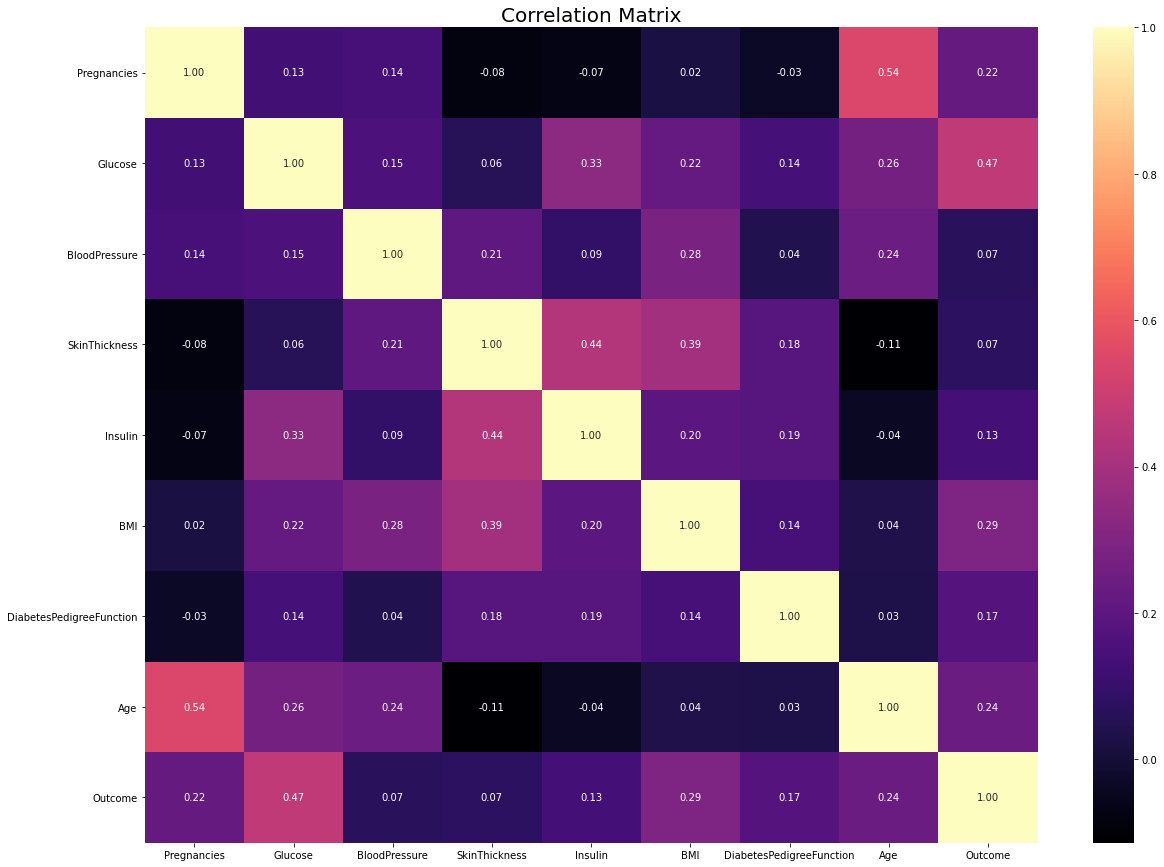

In [24]:
# Correlation matrix of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap ='magma' )
ax.set_title("Correlation Matrix", fontsize=20)
#plt.savefig("corr.png", dpi=400)
plt.show()

## **Data Preprocessing**

## Missing Observation Analysis

We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value. Below we replace 0 value by NaN:

In [23]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [25]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

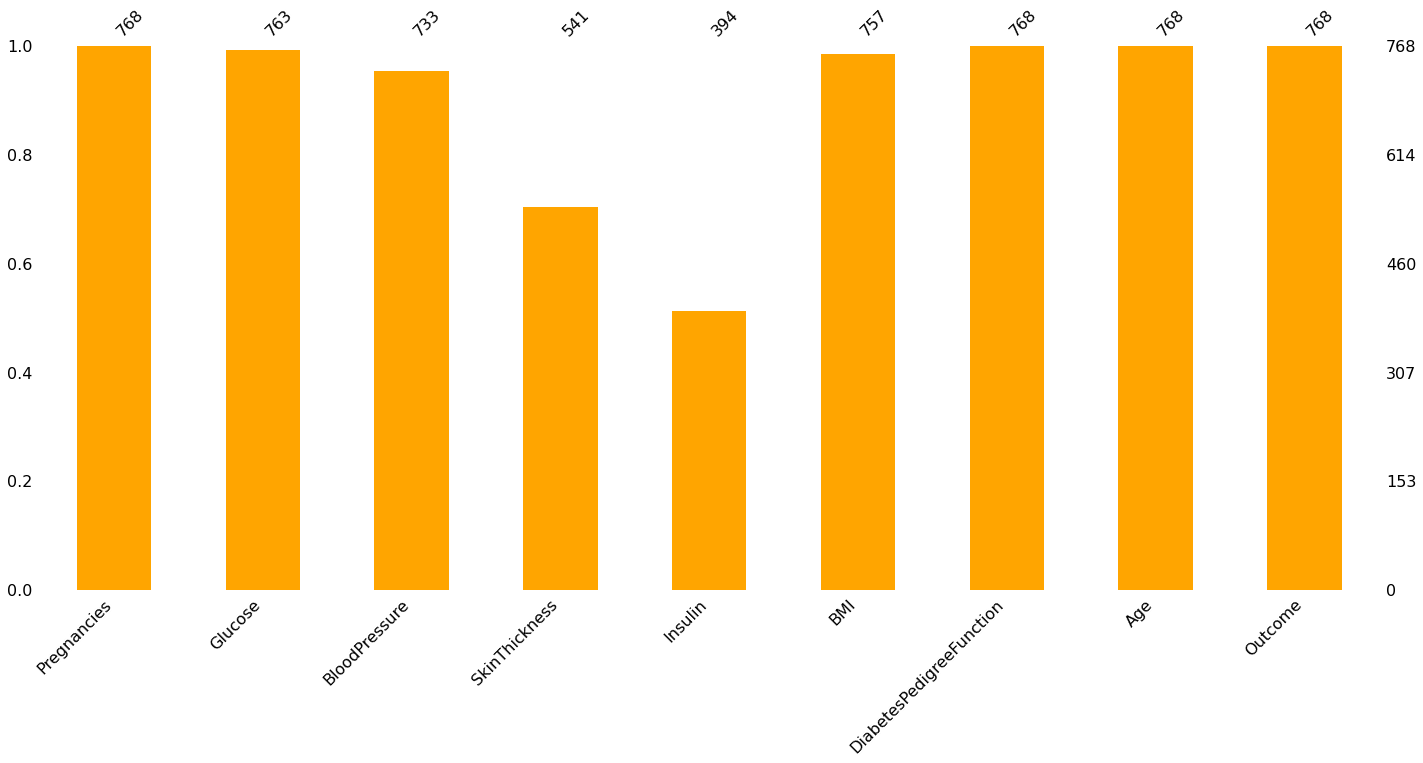

In [26]:
# Visualizing the missing observations using the missingno library
import missingno as msno
msno.bar(df, color="orange");

In [27]:
# The missing values will be filled with the median values of each variable
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [28]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [30]:
# Number of missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Pair plot for clean data

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.

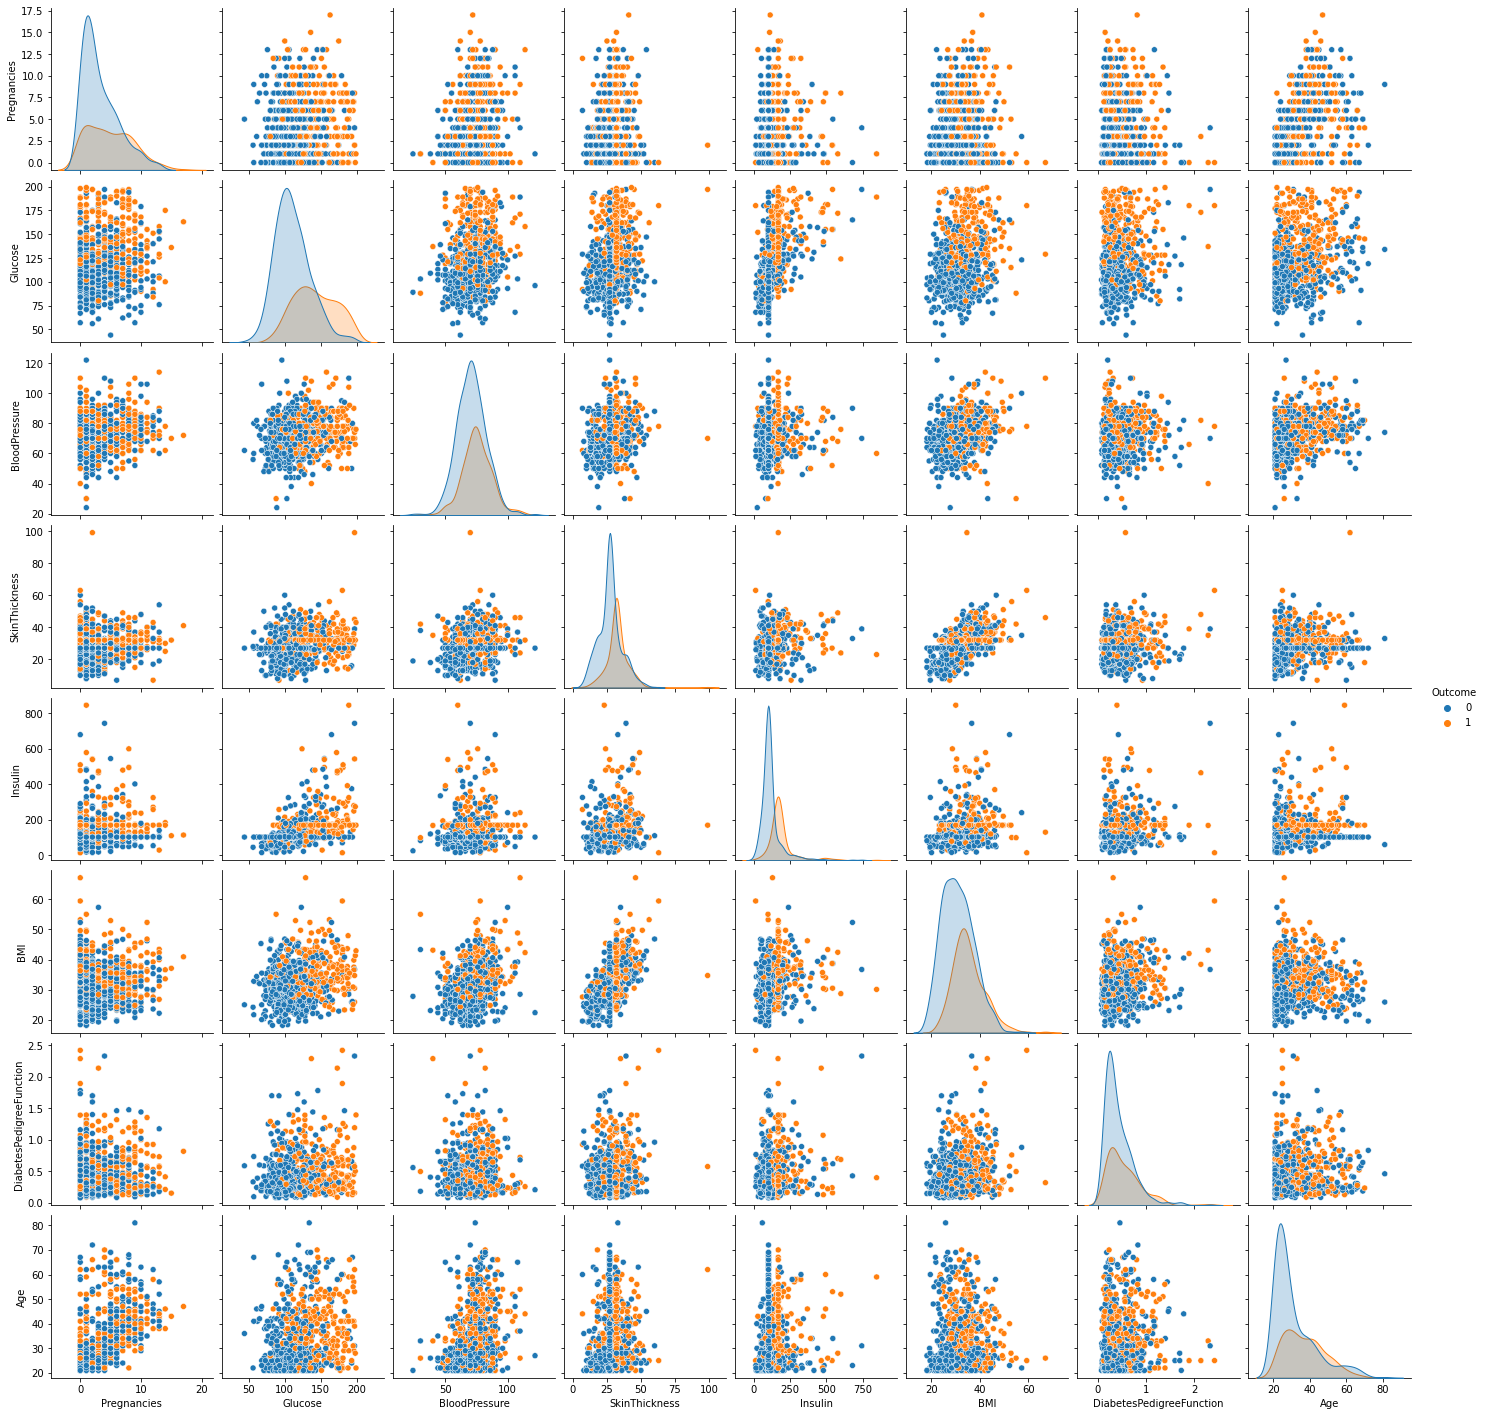

In [31]:
p=sns.pairplot(df, hue = 'Outcome')

## Outlier Observation Analysis

In [32]:
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


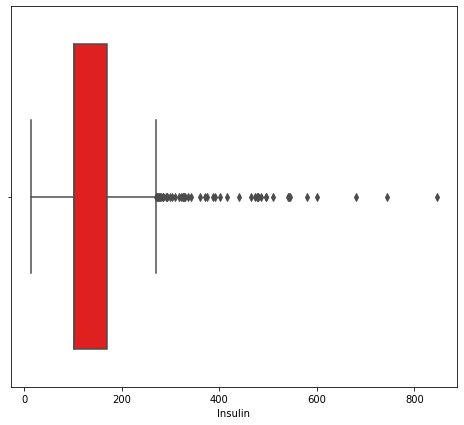

In [33]:
# Outlier observation of Insulin
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = df["Insulin"], color="red");

In [34]:
# Conducting a stand alone observation review for the Insulin variable
# Suppressing contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

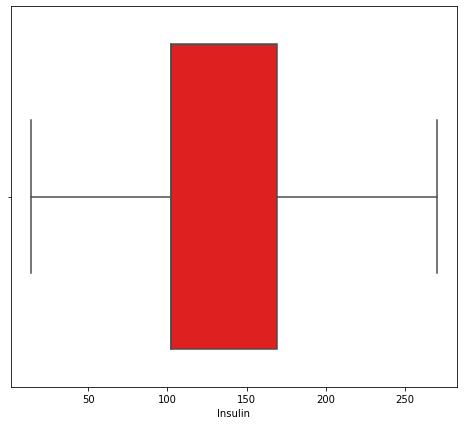

In [35]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = df["Insulin"], color="red");

## Local Outlier Factor (LOF)

In [36]:
# Determining the outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [37]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [38]:
# Choosing the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-1.740031580305444

In [39]:
# Deleting those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [40]:
# Examining the size of the data.
df.shape

(760, 9)

## Feature Engineering

Creating new variables is important for models. But we need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [41]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [43]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [44]:
# The operation performed was added to the dataframe.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [45]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


## One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [47]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [48]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


In [49]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [50]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [51]:
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [52]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [53]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.  
# There are multiple standardization methods. These are methods such as "Normalize", "MinMax", "Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [54]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647
2,1.0,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471
3,-0.4,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588
4,-0.6,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294


In [55]:
X = pd.concat([X,categorical_df], axis = 1)

In [56]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294,1,0,0,0,0,0,0,0,0,1
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647,0,0,0,1,0,1,0,1,0,0
2,1.0,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471,0,0,0,0,0,0,0,0,0,1
3,-0.4,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588,0,0,0,1,0,1,0,1,0,0
4,-0.6,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294,0,0,1,0,0,0,0,0,0,1


In [57]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Base Models

In [58]:
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

LR: 0.848684 (0.036866)
KNN: 0.840789 (0.023866)
RF: 0.881579 (0.026316)
SVM: 0.853947 (0.036488)
XGB: 0.890789 (0.020427)
LightGBM: 0.882895 (0.026610)


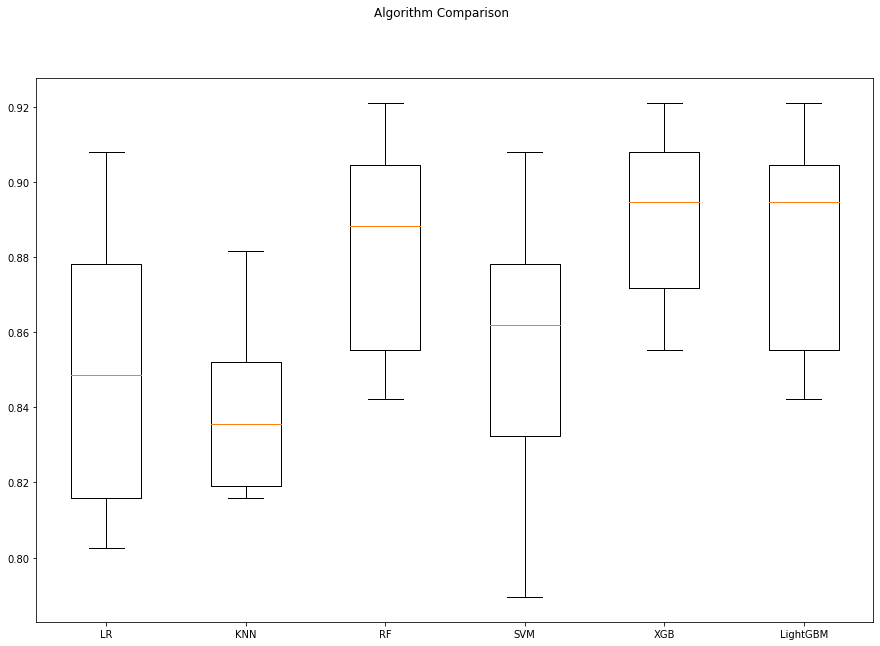

In [59]:
for name, model in models:
    
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### XGB gave the highest accuracy of 89.07%

#### Saving the XGB model

In [61]:
import pickle
pickle.dump(models[4], open("diabetes.pkl",'wb'))